## Exploration 8. New Article Summarization 📰

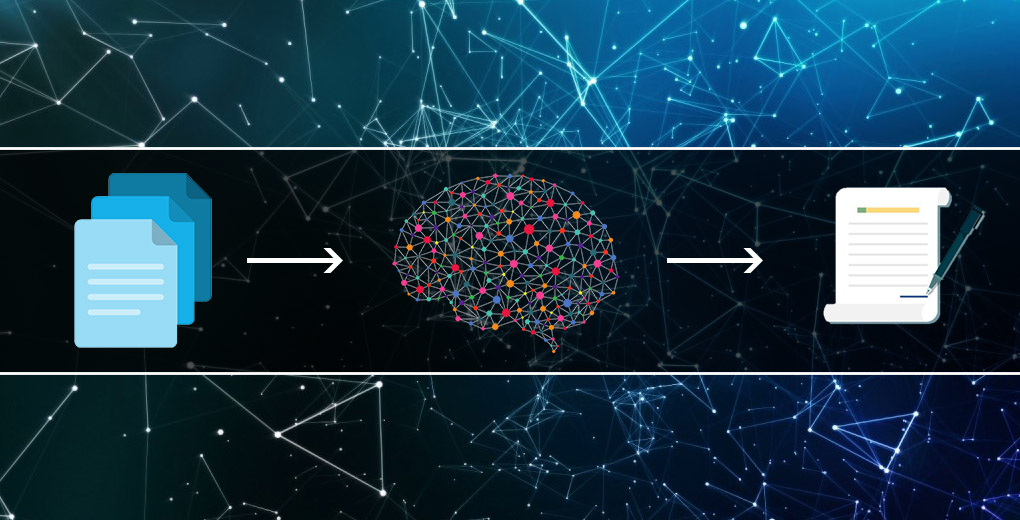

## Table of content

### 1. Introduction

* 1.1 What is Text Summarization?
* 1.2 Summarization Categories?
* 1.3 What is seq2seq with attention?

### 2. Experiment Environment Set-up

* 2.1 Import Libraries

### 3. Load and Preprocessing Data

* 3.1 Load Data
* 3.2 Preprocessing Data
  * 3.2.1 Dropping Duplicate Samples and Null Values
  * 3.2.2 Text Normalization and Remove Stopword
  * 3.2.3 Dividing Dataset into Train & Test
  * 3.2.4 Creating Vocabulary and Integer Encoding

### 4. Creating seq2seq with attention Model

* 4.1 Building Encoder & Decoder
* 4.2 Building Attention Mechanism

### 5. Training Model 

* 5.1 Fitting the Model With Data
* 5.2 Visualization the Validation Loss

### 6. Testing Model 

* 6.1 Implementing the Inference Model
  * 6.1.1 convert the index to word
  * 6.1.2 Setting up the Inference For the Encoder and Decoder
  * 6.1.3 Defining a Functio For Implementation of the Inference Process
  * 6.1.4 Converting an Integer Sequence to a Word Sequence
* 6.2 Compare Headlines with Summary (Abstractive Summarization)
* 6.3 Compare Headlines with Summary (Extractive Summarization)
  * 6.3.1 Load Text Data
  * 6.3.2 Using Summa Summarize

### 7. Improving Model Performance

* 7.1 Modify Parameters
* 7.2 Change the Optimizer
* 7.3 Change the Normalization Method
* 7.4 Change the Number of Vocabulary
* 7.5 Conclusion Improving Model Performance
* 7.6 [Addition] How can we Improve the Model’s Performance Even Further?

### 8. Retrospection

---

### 1. Introduction

### 1.1 What is Text Summarization?

Berry, Dumais, & O’Brien (1995)은 텍스트 요약을 다음과 같이 정의한다.
> Text summarization is the process of distilling the most important information from a text to produce an abridged version for a particular task and user

다시 말해, **주어진 텍스트 중 중요한 정보만 정제**해내는 과정이라는 것이다. 여기서 정제라는 표현과 중요한이라는 표현은 다소 추상적이고 주관적인 표현이기에 개인적으로는 다음과 같이 정의한다. 

`f(text) = comprehensible information`

즉, 텍스트 요약은 원문을 이해하기 쉬우면서도 가치있는 정보로 변환하는 작업이다. 

### 1.2 Summarization Categories?

> Extractive methods select a subset of existing words, phrases, or sentences in the original text to form a summary. In contrast, abstractive methods first build an internal semantic representation and then use natural language generation techniques to create a summary. \
(Gudivada, 2018)

일반적으로 텍스트 요약은 크게 요약문을 생성하는 방식에 따라 **Extractive Summarization**과 **Abstractive Summarization**로 나눈다. 

**Extractive Summarization**
* 보통 문장 단위로 중요도를 scoring한 후, 이를 기반으로 선택하고 조합하여 summary를 만드는 방식
* 글을 읽다가 형광펜을 칠하는 작업과 비슷
* 원문에 있던 텍스트를 활용하기에 표현이 제한적이나 말이 안되는 표현이 포함될 가능성이 낮다.

**Abstractive Summarization**
* 원문을 기반으로 하되, 새로운 텍스트(novel text)를 생성해내는 NLG(natural language generation) 방식
* 새로운 텍스트를 생성해내야 하기에 말이 되지 않는 표현이 만들어질 가능성이 존재
* 그러나 좀 더 flexible한 접근이 가능하다는 장점

이 외에도 원문의 개수에 따라 **Single/Multi Document Summarization**, 생성해내는 텍스트 형태에 따라 **Keyword/Sentence Summarization**, 요약 과정에서 원문 외 외부 정보를 얼마나 사용하는지에 따라 **Knowlege-poor/Rich Summarization** 등 다양한 구분이 있다.
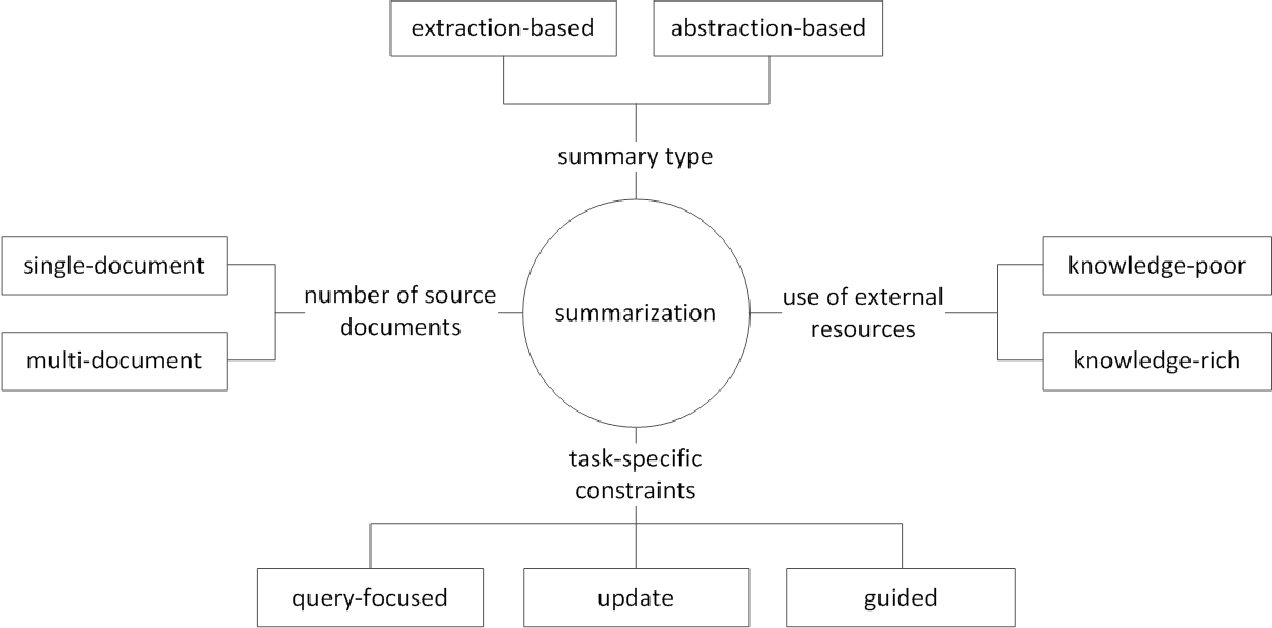
(G. Sizov(2010). Extraction-Based Automatic Summarization: Theoretical and Empirical Investigation of Summarization Techniques)

### 1.3 What is seq2seq with attention?

1950년대 초반부터 기계번역이 시작되었고, 2010년도까지는 통계적인 방식에 의존해 번역을 진행했다. 2014년도 NMT(Neural Machine Translation)가 Neural Network를 이용하여 기계번역을 하며 엄청난 변화를 가져왔다. 이 NMT를 가능하게 해준 핵심 Neural Network Architecture가 바로 **seq2seq**이다.
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fbsvnes%2FbtqXwbZbW3G%2FtHYQAFd5KgevsQNUBmVCTK%2Fimg.png" height="150px" width="350px">
(출처 : https://web.stanford.edu/class/cs224n/slides/cs224n-2019-lecture08-nmt.pdf)

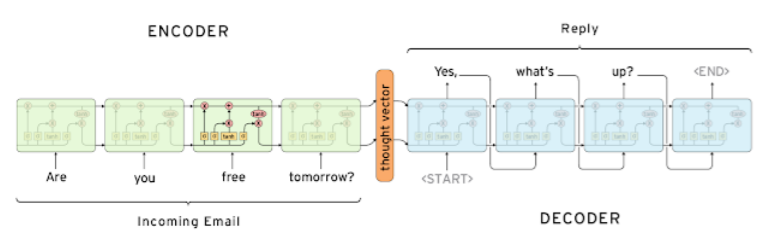
**seq2seq**

* 각각 Encoder , Decoder로 불리는 2개의 RNN으로 구성, sequence(문장)을 입력으로 받고, 입력이 끝나면 sequence를 출력
* Encoder: 입력문장을 받는 RNN, Decoder : 생성 혹은 예측된 문장을 출력하는 RNN
* 실제 성능 문제로 Vanilla RNN보다는 LSTM , GRU로 구성
* Encoder는 모든 입력문장을 input으로 받은 후,  Encoder에서의 맨 마지막 step의 hidden state(context vector, 이 입력문장들이 잘 압축 또는 요약된 정보)들을 Decoder에 넘겨준다.
* Decoder에서는 context vector를 받아 첫번째 hidden state로 사용
* Encoder서는 첫번째 hidden state를 0으로 초기화해 사용, Decoder에서는 Encoder부터 받은 context vector를 첫번째 hidden state로 사용
* seq2seq는 end-to-end로 학습으로 Encoder에서부터 하나하나 순차적으로 진행
* Backpropagation이 진행될 때도, Encoder의 1번째 step까지 가려면 엄청나게 먼 길을 걸어와야 한다.
* 결국 Vanishing Gradient문제가 발생
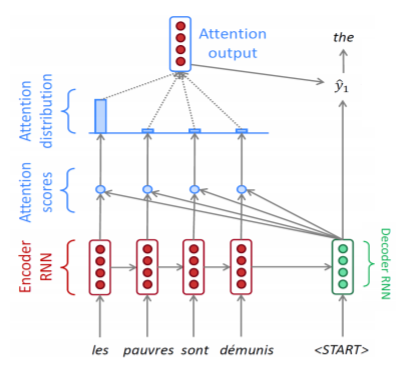

**seq2seq with attention**

* Attention의 기본 아이디어 : Enncoder에서의 각 timestep에서의 hidden state를 Decoder가 다음 단어를 예측할 때 참고하는 것
* Encoder에서 각 timeste마다 출력되는 hidden state를 concat해 따로 기억해준 후 seq2seq와 똑같이 context vector를 Decoder에 넘겨준다.
* Decoder에서는 다음 단어를 예측할 때 context vector와 concat한 hidden state를 통해 집중해야되는 source sequence부분 2가지를 이용

### 2. Experiment Environment Set-up

### 2.1 Import Libraries

In [1]:
# 사용하는 라이브러리 불러오기
import nltk
nltk.download('stopwords')

import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
from wordcloud import STOPWORDS, WordCloud

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 3. Load and Preprocessing Data

### 3.1 Load Data

In [2]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [3]:
data.sample(10)

,headlines,text
73018,Mayweather tried to bet Ã¢ÂÂ¹2.5 cr on knocki...,Floyd Mayweather reportedly tried placing a Ã¢...
89382,SBI to charge Ã¢ÂÂ¹25 for each ATM withdrawal...,The State Bank of India is going to introduce ...
35255,Haryana man held for working for female Pakist...,A 23-year-old man from Haryana has been arrest...
71834,Lil Wayne hospitalised after suffering from se...,Rapper Lil Wayne was hospitalised after being ...
92416,Artist makes graffiti of Messi kissing Ronaldo...,A street artist has drawn a graffiti portrayin...
72715,Air Force Base to be back-up for Delhi Airport...,Keeping in view flight delays in Delhi during ...
41831,Top seer writes to Shah supporting Lingayat mi...,Chitradurga Mutt seer Shivamurthy Murugha Shar...
35430,I was diagnosed with bipolar disorder in 2001:...,"Singer Mariah Carey, while opening up about he..."
23190,"Apple asked to pay Ã¢ÂÂ¹1,000 crore in patent...",A federal jury in US' California has awarded C...
92050,Apple CEO threatened to remove Uber from App S...,Apple CEO Tim Cook in 2015 threatened to remov...


* 이 데이터는 기사의 본문에 해당되는 text와 headlines 두 가지 열로 구성되어져 있다. 
* 추상적 요약 : text를 본문, headlines를 이미 요약된 데이터로 삼아서 모델을 학습
* 추출적 요약 : 오직 text열만을 사용

### 3.2 Preprocessing Data

### 3.2.1 Dropping Duplicate Samples and Null Values

In [4]:
print('headlines 열에서 중복을 배제한 유일한 샘플의 수 :', data['headlines'].nunique())
print('text 열에서 중복을 배제한 유일한 샘플의 수 :', data['text'].nunique())

headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280
text 열에서 중복을 배제한 유일한 샘플의 수 : 98360


In [5]:
# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다
data.drop_duplicates(subset = ['headlines'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98280


In [6]:
print(data.isnull().sum())

headlines    0
text         0
dtype: int64


### 3.2.2 Text Normalization and Remove Stopword

In [7]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [8]:
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [9]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (headlines)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [10]:
clean_text = []
# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
for s in data['text']:
    clean_text.append(preprocess_sentence(s))

# 전처리 후 출력
print("text 전처리 후 결과: ", clean_text[:5])

text 전처리 후 결과:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insur

In [11]:
clean_headlines = []
# 전체 headlines 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
for s in data['headlines']:
    clean_headlines.append(preprocess_sentence(s, False))

print("headlines 전처리 후 결과: ", clean_headlines[:5])

headlines 전처리 후 결과:  ['upgrad learner switches to career in ml al with salary hike', 'delhi techie wins free food from swiggy for one year on cred', 'new zealand end rohit sharma led india match winning streak', 'aegon life iterm insurance plan helps customers save tax', 'have known hirani for yrs what if metoo claims are not true sonam']


In [12]:
# 텍스트 정제의 과정을 거친 후에는 다시 한번 빈(empty) 샘플이 생겼는지 확인
# 정제 전에는 데이터가 존재했지만, 정제 과정에서 문장의 모든 단어가 사라지는 경우가 있을 수 있다. 
data['text'] = clean_text
data['headlines'] = clean_headlines

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)

In [13]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [14]:
# 전체 샘플수 확인
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98280


### 3.2.3 Dividing Dataset into Train & Test

### A. Set the maximum sample length

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.10031542531542
헤드라인의 최소 길이 : 1
헤드라인의 최대 길이 : 16
헤드라인의 평균 길이 : 9.2995115995116


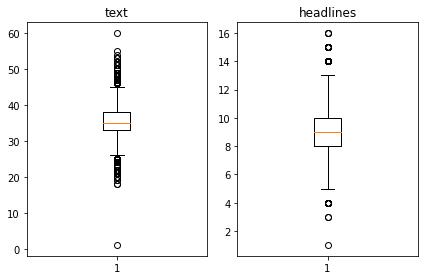

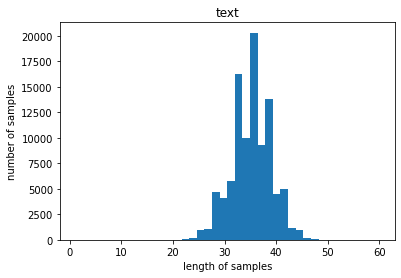

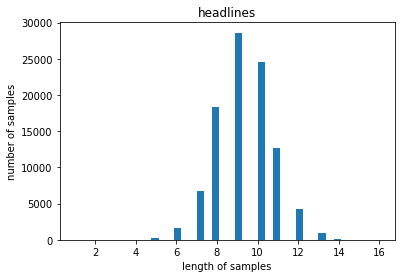

In [15]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
headlines_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('헤드라인의 최소 길이 : {}'.format(np.min(headlines_len)))
print('헤드라인의 최대 길이 : {}'.format(np.max(headlines_len)))
print('헤드라인의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

* text의 경우 최소 길이가 1, 최대 길이가 60으로 그 차이가 좀 있다. 하지만 평균 길이는 35로 시각화된 그래프로 봤을 때는 대체적으로는 30~40 내외의 길이를 가진다는 것을 확인할 수 있다.

* headlines의 경우 최소 길이가 1, 최대 길이가 16, 그리고 평균 길이가 9로 text에 비해 상대적으로 길이가 매우 짧다. 그래프로 봤을 때에도 대체적으로 8~10의 길이를 가지고 있다.

In [16]:
# 통계적으로 확인하기 위한 함수
# 통계로 확인해 객관적으로 길이 결정
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s.split()) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [17]:
# 각각 38과 11로 정했는데 이 길이를 선택했을 때, 얼마나 많은 샘플들을 자르지 않고 포함할 수 있는지 통계로 확인
text_max_len = 38
headlines_max_len = 11

below_threshold_len(text_max_len, data['text'])
below_threshold_len(headlines_max_len,  data['headlines'])

전체 샘플 중 길이가 38 이하인 샘플의 비율: 0.8163105413105413
전체 샘플 중 길이가 11 이하인 샘플의 비율: 0.944993894993895


* Box plot으로 확인했을 때 3Q지점에 해당하는 38(text), 11(headlines)로 지정한다.
* 38과 11로 패딩을 하게되면 text는 약 19%, headlines는 약 6% 정도의 샘플들 내용이 망가지게 된다.
* 정해진 길이에 맞춰 자르는 것이 아니라, 정해진 길이보다 길면 제외하는 방법으로 데이터를 정제한다.

In [18]:
data = data[data['text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['headlines'].apply(lambda x: len(x.split()) <= headlines_max_len)]
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 75692


### B. Add sostok and eostok

In [19]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

,headlines,text,decoder_input,decoder_target
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
5,rahat fateh ali khan denies getting notice for...,pakistani singer rahat fateh ali khan denied r...,sostoken rahat fateh ali khan denies getting n...,rahat fateh ali khan denies getting notice for...
7,govt directs alok verma to join work day befor...,weeks ex cbi director alok verma told departme...,sostoken govt directs alok verma to join work ...,govt directs alok verma to join work day befor...
8,called pm modi sir times to satisfy his ego an...,andhra pradesh cm chandrababu naidu said met u...,sostoken called pm modi sir times to satisfy h...,called pm modi sir times to satisfy his ego an...


* 'decoder_input'의 앞에 'sostoken' 을 추가, 'decoder_target'의 끝에는 'eostoken'을 추가

### C.  Data suffle and split

In [20]:
encoder_input = np.array(data['text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

In [21]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[40561 26817 50053 ... 20352 31805 48081]


In [22]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [23]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 15138


In [24]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]   
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 60554
훈련 레이블의 개수 : 60554
테스트 데이터의 개수 : 15138
테스트 레이블의 개수 : 15138


### 3.2.4 Creating Vocabulary and Integer Encoding

### A. Encoder Train Data

In [25]:
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

In [26]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 60158
등장 빈도가 6번 이하인 희귀 단어의 수: 41138
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 19020
단어 집합에서 희귀 단어의 비율: 68.38325742212174
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.091919182074249


* encoder_input_train에는 6만여 개의 단어가 있다.
* 등장 빈도가 threshold 값인 7회 미만, 즉 6회 이하인 단어들은 단어 집합에서 무려 68% 이상을 차지
* 하지만 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 적은 수치인 4.1%밖에 되지 않는다.
* 그래서 등장 빈도가 6회 이하인 단어들은 정수 인코딩 과정에서 빼고, 훈련 데이터에서 제거
* 위에서 이를 제외한 단어 집합의 크기를 만 9천여 개로 계산
* 이와 비슷한 값으로 어림잡아 단어 집합의 크기를 19,000으로 제한

In [27]:
src_vocab = 19000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 19,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성

* 현재 단어 집합의 크기를 19,000으로 제한했으므로 이제 19,000이 넘는 숫자들은 정수 인코딩 후에는 데이터에 존재하지 않는다.

In [28]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[4, 10, 3227, 1401, 176, 3227, 433, 4, 468, 10, 689, 839, 211, 1902, 4, 291, 953, 10, 684, 176, 3974, 848, 1070, 2076, 282, 16, 1309, 179, 339, 476, 989], [125, 584, 1637, 370, 373, 116, 5704, 3146, 4475, 13544, 228, 109, 167, 768, 125, 313, 1, 258, 98, 3146, 4475, 34, 73, 3146, 4475, 5207, 167, 125, 109, 14872, 5, 165], [457, 15, 1131, 876, 1, 1418, 66, 996, 533, 2601, 11187, 513, 19, 1034, 4, 1497, 606, 251, 5544, 568, 2905, 1795, 221, 533, 2601, 1, 2, 359, 24, 2202, 3208, 270, 19, 275, 251, 1989, 1583]]


#### Q. 왜 단어 집합의 크기를 줄이면 등장 빈도가 낮은 단어들이 없어지는 것일까?

* 자연어 처리에서는 텍스트를 숫자로 바꾸는 여러가지 기법들이 있다. 
* 이러한 기법들을 본격적으로 적용시키기 위한 첫 단계로 각 단어를 고유한 정수에 맵핑(mapping)시키는 전처리 작업이 필요하다.
* 보통 단어에 정수를 부여할 때 단어를 빈도수 순으로 정렬한 단어 집합(vocabulary)을 만들고, **빈도수가 높은 순서대로 차례로 낮은 숫자부터 정수를 부여**
* 위도 동일한 방법으로 Encoding이 이루어졌으므로 `정수가 큰 단어 = 빈도수가 적은 단어`
* 따라서, 단어 집합 크기를 줄이면 빈도가 낮은 단어들이 잘려나간다.

### B. Decoder Train Data

In [29]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [30]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 26954
등장 빈도가 5번 이하인 희귀 단어의 수: 17919
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 9035
단어 집합에서 희귀 단어의 비율: 66.47992876752986
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.590420802779795


* encoder_input_train에는 2만여 개의 단어가 있다.
* 등장 빈도가 threshold 값인 6회 미만, 즉 5회 이하인 단어들은 단어 집합에서 무려 66% 이상을 차지
* 하지만 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 적은 수치인 5.6%밖에 되지 않는다.
* 그래서 등장 빈도가 5회 이하인 단어들은 정수 인코딩 과정에서 빼고, 훈련 데이터에서 제거
* 위에서 이를 제외한 단어 집합의 크기를 9000개로 계산

In [31]:
tar_vocab = 9000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 2575, 996, 6, 10, 377, 4, 44, 3495, 945], [1, 159, 1186, 1473, 193, 284, 234, 1266, 262], [1, 202, 1745, 3, 3404, 4534, 669, 4535, 4, 77, 1284], [1, 19, 3182, 2634, 6, 4, 1872, 378, 116], [1, 1152, 2706, 17, 3872, 176, 289, 1451, 416, 3756]]
target
decoder  [[2575, 996, 6, 10, 377, 4, 44, 3495, 945, 2], [159, 1186, 1473, 193, 284, 234, 1266, 262, 2], [202, 1745, 3, 3404, 4534, 669, 4535, 4, 77, 1284, 2], [19, 3182, 2634, 6, 4, 1872, 378, 116, 2], [1152, 2706, 17, 3872, 176, 289, 1451, 416, 3756, 2]]


* 현재 단어 집합의 크기를 9000으로 제한했으므로 이제 9000이 넘는 숫자들은 정수 인코딩 후에는 데이터에 존재하지 않는다.
* 그런데 전체 데이터에서 빈도수가 낮은 단어가 삭제되었다는 것은 빈도수가 낮은 단어만으로 구성되었던 샘플들은 이제 빈(empty) 샘플이 되었을 가능성이 있다. 
* 훈련 데이터와 테스트 데이터에 대해서 요약문의 길이가 1인 경우의 인덱스를 각각 drop_train과 drop_test에 라는 변수에 저장하고 확인해본다.
* 만약 있다면 삭제한다.

In [32]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 1
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 60553
훈련 레이블의 개수 : 60553
테스트 데이터의 개수 : 15138
테스트 레이블의 개수 : 15138


### C. Padding

In [33]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='post')

### 4. Creating seq2seq with attention Model

### 4.1 Building Encoder & Decoder

In [34]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [35]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [36]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 38)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 38, 128)      2432000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 38, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

### 4.2 Building Attention Mechanism

In [37]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 38)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 38, 128)      2432000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 38, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

### 5. Training Model 

### 5.1 Fitting the Model With Data

In [38]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1, restore_best_weights = True)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
237/237 [==============================] - 143s 538ms/step - loss: 5.9913 - val_loss: 5.5588
Epoch 2/50
237/237 [==============================] - 126s 531ms/step - loss: 5.4743 - val_loss: 5.2548
Epoch 3/50
237/237 [==============================] - 125s 527ms/step - loss: 5.1429 - val_loss: 4.9642
Epoch 4/50
237/237 [==============================] - 125s 528ms/step - loss: 4.8710 - val_loss: 4.7763
Epoch 5/50
237/237 [==============================] - 125s 528ms/step - loss: 4.6546 - val_loss: 4.6198
Epoch 6/50
237/237 [==============================] - 126s 533ms/step - loss: 4.4712 - val_loss: 4.5019
Epoch 7/50
237/237 [==============================] - 126s 530ms/step - loss: 4.3077 - val_loss: 4.3906
Epoch 8/50
237/237 [==============================] - 125s 526ms/step - loss: 4.1602 - val_loss: 4.3232
Epoch 9/50
237/237 [==============================] - 125s 526ms/step - loss: 4.0318 - val_loss: 4.2368
Epoch 10/50
237/237 [==============================] - 125s 527m

* `EarlyStopping`을 통해 validation loss가 증가할 때 fitting을 멈춘다.
* 변수 `restore_best_weights`을 `True`로 설정하여 모델의 성능이 가장 좋은 시점(가중치가 가장 좋은 시점)을 저장한다.

### 5.2 Visualization the Validation Loss

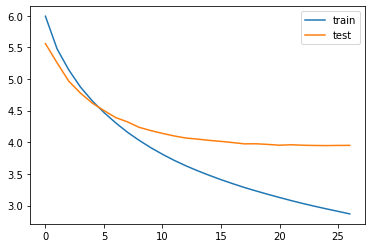

In [39]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### 6. Testing Model 

### 6.1 Implementing the Inference Model

### 6.1.1 convert the index to word 

In [40]:
# 정수 인덱스 행렬로 존재하던 텍스트 데이터를 실제 데이터로 복원해야 하므로, 필요한 3개의 사전 준비

src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

### 6.1.2 Setting up the Inference For the Encoder and Decoder

In [41]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = \
decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [42]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

### 6.1.3 Defining a Functio For Implementation of the Inference Process

In [43]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

### 6.1.4 Converting an Integer Sequence to a Word Sequence 

In [44]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

### 6.2 Compare Headlines with Summary (Abstractive Summarization)

원래의 요약문(headlines 열)과 학습을 통해 얻은 추상적 요약의 결과를 비교해 보세요.

In [45]:
for i in range(20):
    print(i+1, "-------------------------------------------------------")
    print("<원문> :", seq2text(encoder_input_test[i]))
    print("[실제 요약] :", seq2summary(decoder_input_test[i]))
    print("[예측 요약] :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

1 -------------------------------------------------------
<원문> : madhya pradesh minister bhupendra singh said never opposed playing songs film padmaavat adding comments misconstrued singh said saying nobody take law hands even objections song singh asserted never meant say people play songs movie banned 
[실제 요약] : mp minister denies he opposed playing of padmaavat songs 
[예측 요약] :  will not be like to be like mp cm yogi


2 -------------------------------------------------------
<원문> : comedian kapil sharma took twitter wish sunil grover occasion th birthday thursday wish happy birthday sunil may god bless happiness world lots love always tweeted kapil notably sunil left kapil show following fight took place flight 
[실제 요약] : kapil sharma wishes sunil grover on his th birthday 
[예측 요약] :  kapil wishes sunil grover to kapil sharma show


3 -------------------------------------------------------
<원문> : soldiers fighting world war ceased played football enemy troops christmas day starting

[예측 요약] :  people rescued from us after being denied




* '실제요약'문과 '예측요약'문에 비슷한 단어들이 주로 사용된 경우도 있고 완전 다른 형태로 요약된 경우들도 보인다.
* 그리고 실제 원문에서는 보이지 않는 단어들이 '예측요약'에 사용된 경우를 확인할 수 있다.
* 의미없이 같은 구절(단어)이 계속 반복되는 경우도 확인할 수 있다.
* 일부 예측 요약은 실제 요약과 비슷한 의미를 전달하고 있으나, 일부 예측 요약에서는 무슨 말인지 알 수 없는 문장이 확인된다.
* 무슨 말인지 알 수 없는 문장이 출력된 경우에는 핵심적인 단어들을 포함하고 있으나 문법적으로 맞지 않아 의미전달이 제대로 되지 않는 것으로 보인다.
* 데이터 자체를 변경할 수 있는 상황은 아니므로 모델의 성능 개선을 고려해본다.

### 6.3 Compare Headlines with Summary (Extractive Summarization)

### 6.3.1 Load Text Data

In [46]:
import requests
from summa.summarizer import summarize

In [47]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [48]:
data['text'].sample(10)

35803    The Central Bureau of Investigation on Friday ...
91600    Former AAP leader Mayank Gandhi urged Delhi CM...
58740    The Centre's Higher Education Financing Agency...
12663    The leader of a World War II raid to foil Nazi...
86676    Actor Rishi Kapoor took to Twitter to share a ...
12206    Tata Motors-owned British luxury carmaker Jagu...
6366     Rahul Walke, a Buddhist monk, was killed in an...
40945    No toilets were constructed in Delhi under Swa...
30805    After 18 people were killed when an under-cons...
97747    The Pig Beach, also called Big Major Cay, loca...
Name: text, dtype: object

### 6.3.2 Using Summa Summarize

* text (str) : 요약할 테스트.
* ratio (float, optional) : 요약문에서 원본에서 선택되는 문장 비율. 0~1 사이값
* words (int or None, optional) : 출력에 포함할 단어 수.
* 만약, ratio와 함께 두 파라미터가 모두 제공되는 경우 ratio는 무시
* split (bool, optional) : True면 문장 list / False는 조인(join)된 문자열을 반환

In [49]:
for i in range(10):
    print(i+1, "-------------------------------------------------------")
    print("원문 :", data['text'][i])
    print("\n")
    print("실제 요약 :", data['headlines'][i])
    print("추출적 요약(ratio) :", summarize(data["text"][i], ratio=0.5))
    print("추출적 요약(words) :", summarize(data["text"][i], words=20))
    print("\n")

1 -------------------------------------------------------
원문 : Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.


실제 요약 : upGrad learner switches to career in ML & Al with 90% salary hike
추출적 요약(ratio) : upGrad's Online Power Learning has powered 3 lakh+ careers.
추출적 요약(words) : The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike.
upGrad's Online Power Learning has powered 3 lakh+ careers.


2 -------------------------------------------------------
원문 : Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a D

* 추상적 요약에 비해 글이 자연스럽게 출력된다.
* 원문에서 추출을 하는 요약이다 보니 요약 문장이 보다 길게 출력된다.
* 단어수와 비율로 추출요약을 한 내용을 비교해보면 크게 차이점이 없음을 확인할 수 있었다.
* 대체적으로 요약이 잘된 것처럼 보이나,
* 일부 결과는 실제 요약 및 원문에서 이야기하고자 하는 바와 달리 주제에 어긋나는 듯한 요약이 출력되기도 한다.

### 7. Improving Model Performance

### 7.1 Modify Parameters

* embedding_dim = 128 → 256
* hidden_size = 256 → 512

* 모델의 성능 개선을 위해 `parameters`를 수정해보았다.
* loss가 어느정도 개선된 것이 보이나 요약 결과에 영향을 미칠 정도는 아닌 것으로 파악됨.
* 요약 결과(추상, 추출 모두)가 수정 전과 큰 차이를 보이지 않았다.  

* Refer to file `Attachment 1.NewsArticleSummarization_Parameter.ipynb` for detail

### 7.2 Change the Optimizer

* optimizer : rmsprop → adam

* 모델의 성능 개선을 위해 `optimizer`를 수정해보았다.
* loss의 개선 정도나 요약 결과에 유의미한 차이를 보이지 않았다. 
* 요약 결과(추상, 추출 모두)가 수정 전과 큰 차이를 보이지 않았다.

* Refer to file `Attachment 2.NewsArticleSummarization_Optimizer.ipynb` for detail

### 7.3 Change the Normalization Method

* See the table contents of 2.2.2 Text Normalization and Remove Stopword for changes

* 모델의 성능 개선을 위해 `Normalization Method`를 수정해보았다.
* 모델 학습 시 과적합이 보다 빠르게 일어났으며, loss의 개선 정도나 요약 결과에 유의미한 차이를 보이지 않았다.
* 추출 요약 결과는 수정 전과 큰 차이를 보이지 않았다.
* 추상 요약 결과는 오히려 의미없는 동일 단어의 반복 현상이 잦게 나타나고 있으며, 요약문의 품질이 더 떨어지는 것으로 보인다.

* Refer to file `Attachment 3.NewsArticleSummarization_Normalization.ipynb` for detail

### 7.4 Change the Number of Vocabulary

* text_max_len = 38 → 45
* headlines_max_len = 11 → 13
* src_vocab = 19000 → 22000
* tar_vocab = 9000 → 10000

* 모델의 성능 개선을 위해 단어사전의 수를 수정해보았다.
* loss의 개선 정도는 눈에 띄는 개선이 확인되지 않았다.
* 추출 요약 결과는 수정 전과 큰 차이를 보이지 않았다.
* 추상 요약 결과는 실제 요약과 비슷하게 출력되는 문장이 많았다.
* 학습한 단어의 수가 많아져 더 다양한 문장들이 출력되는 것으로 파악된다.

* Refer to file `Attachment 4.NewsArticleSummarization_Vocabulary.ipynb` for detail

### 7.5 Conclusion Improving Model Performance

* 모델의 성능을 개선시키기 위해 여러 변화를 줘보았으나, 유의미한 개선을 찾아내지는 못했다.
* 다만, 한 가지 알 수있었던 점이 있었다. 
* 정규화가 제대로 이루어지지 않았을 경우, 출력되는 문장의 품질이 좋지 못했다는 점
* 단어사전의 볼륨을 키워 모델에 투입되는 데이터 양을 늘렸을 때, 출력되는 문장의 품질이 조금 더 좋게 나왔다는 점
* 위 두 결과를 두고 봤을 때, 좋은 결과를 얻기 위해서는 모델의 성능을 개선시키는 것보다
* **많은 양의 데이터** 그리고 **높은 품질의 데이터**가 결과에 더 많은 영향을 줄 가능성이 있다는 것을 확인하였다.

### 7.6 [Addition] How can we Improve the Model’s Performance Even Further?

* Increase the training dataset size and build the model. The generalization capability of a deep learning model enhances with an increase in the training dataset size
* Try implementing Bi-Directional LSTM which is capable of capturing the context from both the directions and results in a better context vector
* Use the beam search strategy for decoding the test sequence instead of using the greedy approach (argmax)
* Evaluate the performance of your model based on the BLEU score
* Implement pointer-generator networks and coverage mechanisms

### 8. Retrospection

### 8.1 What was difficult

* 역시 아무래도 모델이 학습하는 시간이 너무 오래걸려 다양한 시도들을 해보지 못한 아쉬움이 있다.

### 8.2 What I found out

* seq2seq 모델의 기능에 대해 이전보다 조금 더 이해가 된 듯하다.
* 정수 인코딩과 단어 빈도수의 관계에 대해 알 수 있었다. 
* 많은 시도들로 데이터의 양과 품질의 중요성에 대해 조금이나마 이해할 수 있었다. 

https://github.com/ziishaned/learn-regex/blob/master/translations/README-ko.md

### 8.3 What I want to know more about

* 모델 성능을 개선하는데, 과적합을 방지할 수 있는 방법들도 적용해봤으면 다른 결과를 얻을 수 있었을 것 같다.
* 시간만 더 있었더라면 아래 코드를 따라 BiLSTM도 적용해보고 모델의 개선 정도를 확인해볼 수 있었을 것 같다. 

https://www.kaggle.com/akashsdas/abstractive-text-summarization/notebook

* seq2seq 모델을 평가하는 다양한 방식들이 존재했는데, 이에 대해 더 공부하고 적용해보고 싶다.

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=datajuny&logNo=221565052342

* 문장이 출력될 때 동일한 단어가 의미없이 반복되어 출력되는 것을 `Text Degeneration`이라고 한다.
* 상단의 함수 `decode_sequence(input_seq)` 내부에서 `sampled_token_index = np.argmax(output_tokens[0, -1, :])` 부분을 보면 :로 되어 있는 부분 중 가장 큰 값을 갖는 index를 뽑아온다는 것으로 만일 두 토큰이 강하게 연관되어 있거나, 스스로를 계속 추천한다면 문장이 끝날 때까지 같은 단어을 반복하게 된다. 
* 이 부분에서 한 번 나온 단어는 다음 또 나올 확률에 일정 패널티를 주는 식으로 수정한다면 동일 단어가 반복되는 것을 어느정도 개선할 수 있지 않을까 생각한다. 
* 이외에도 이를 보완하기 위한 대안들이 다양했다.이를 적용시켰다면 좀 더 나은 결과들이 출력되지 않았을까 생각이 든다.

https://medium.com/dasha-ai/what-is-neural-text-degeneration-b6e0aaab9670

https://huggingface.co/blog/how-to-generate?fbclid=IwAR19kbEiW_sF19TeSr4BE4jQZSIqz0GzOFD2013fIGEH32DReW9pAFq6vDM

https://arxiv.org/pdf/1803.07133.pdf

https://arxiv.org/pdf/1801.07736v3.pdf

https://openreview.net/pdf?id=rygGQyrFvH

http://dsba.korea.ac.kr/seminar/?mod=document&uid=1345

### 8.4 Self-Resolution

* 모델 성능 개성도 중요하지만 데이터 전처리는 더 중요한 것 같다. 
* 여러 데이터들을 보면서 EDA를 적절하게 잘 할 수 있는 감각을 키울 필요가 있다.

**[what I've been thinking]**
* 이번에 진행해본 텍스트 요약의 경우 뉴스 데이터를 가지고 진행했다.
* 뉴스 데이터가 가지는 아래 특성을 고려하면 추상적요약보다 추축적요약 방식이 더 적절하지 않나 생각이 든다.
  * 뉴스데이터의 특성
    * 전문 기자에 의해 육하원칙을 기반으로 기본 문서 형식이 갖춰진 형태로 작성됨
    * 기사 제목은 본문 내용의 주제를 대표하여 작성되며, 본문의 경우 내용 중복 없이 간결하게 표현됨
    * 사실에 기반한 정보를 제공하며, 문법적인 오류가 거의 없음
* 추가적으로 데이터를 직접 다 살펴보지는 못 했으나 뉴스 '헤드라인'이라는 데이터의 특성이 가지는 문제가 있을 수 있다고 생각한다.
* 모든 기자들이 그런 것은 아니지만 일부 뉴스 헤드라인을 보면 뉴스의 내용을 잘 함축해서 작성하기보다 기사의 조회수를 높이기 위한 자극적이 헤드라인을 작성하는 경우도 없지 않다.
* 이러한 부분들도 결과에 영향을 미칠 수 있다 생각한다.

**[References]**

* text summarization이란?
https://github.com/uoneway/Text-Summarization-Repo
* seq2seq with attention이란?
https://blahblahlab.tistory.com/136?category=1179157
* Improve Model's Performance
https://www.analyticsvidhya.com/blog/2019/06/comprehensive-guide-text-summarization-using-deep-learning-python/

**[Attachments]**

* Attachment 1.NewsArticleSummarization_Parameter.ipynb
* Attachment 2.NewsArticleSummarization_Optimizer.ipynb
* Attachment 3.NewsArticleSummarization_Normalization.ipynb
* Attachment 4.NewsArticleSummarization_Vocabulary.ipynb 